In [101]:
# Allow reload of objects
%load_ext autoreload
%autoreload
from pelenet.utils import Utils
from pelenet.experiments.readout import ReadoutExperiment

# Official modules
import numpy as np
import nxsdk.api.n2a as nx
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import os
from time import time

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Initilizes the experiment and utils
utils = Utils.instance()
exp = ReadoutExperiment()

In [3]:
# Build network
exp.build()

# Get spectral radius
utils.getSpectralRadius(exp.net.initialWeights)

1.665

In [4]:
# Run network
exp.run()

INFO:DRV:  Connecting to 127.0.0.1:34185
INFO:DRV:      Host server up..............Done 0.29s
Compiling in directory : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1585909312.5759742
Include dir is : /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/
Compiling -c /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1585909312.5759742/initnetwork_0_0.c
gcc -Wall -I/home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/graph/nxinputgen/../../snips/ -I/home/seq/05-reward/v0.x/pelenet/snips/ -Inxsdk/include -fno-stack-protector -msoft-float -m32 -march=i586 -fno-builtin-printf -fno-builtin-sprintf -fno-builtin-fprintf -fno-builtin-memcpy -fstrict-volatile-bitfields -Os -DNDEBUG -std=c99 -o /home/seq/.local/share/virtualenvs/seq-r0_WvjR

INFO:DRV:      Compiling Embedded snips....Done 2.78s
INFO:DRV:      Encoding axons/synapses.....Done 15.08s
INFO:DRV:      Encoding probes.............Done 4.02ms
INFO:HST:  Using Kapoho Bay serial number 308
INFO:HST:  Args chip=0 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1585909312.5759742/launcher_chip0_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Args chip=1 cpu=0 /home/seq/.local/share/virtualenvs/seq-r0_WvjRo/lib/python3.5/site-packages/nxsdk/driver/compilers/../../../temp/1585909312.5759742/launcher_chip1_lmt0.bin --chips=2 --remote-relay=0 --epoch=0 
INFO:HST:  Lakemont_driver...
INFO:DRV:      Booting up..................Done 1.63s
INFO:DRV:      Transferring probes.........Done 0.04s
INFO:DRV:      Configuring registers.......Done 15.65s
INFO:DRV:      Transferring spikes.........Done 0.04s
INFO:HST:  chip=0 cpu=0 Transfered values 20, 235, 30 
INFO:HST:  chip=1 cpu=0 Transfered values 

INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3760 to 3790
INFO:HST:  chip=1 cpu=0 Reset functional state at 3790
INFO:HST:  chip=0 cpu=0 Reset functional state at 3790
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 3995 to 4025
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 3995 to 4025
INFO:HST:  chip=0 cpu=0 Reset functional state at 4025
INFO:HST:  chip=1 cpu=0 Reset functional state at 4025
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4230 to 4260
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4230 to 4260
INFO:HST:  chip=1 cpu=0 Reset functional state at 4260
INFO:HST:  chip=0 cpu=0 Reset functional state at 4260
INFO:HST:  chip=1 cpu=0 Reset current/voltage from time step 4465 to 4495
INFO:HST:  chip=0 cpu=0 Reset current/voltage from time step 4465 to 4495
INFO:HST:  chip=1 cpu=0 Reset functional state at 4495
INFO:HST:  chip=0 cpu=0 Reset functional state at 4495
INFO:HST:  chip=0 cpu=0 Reset current/volt

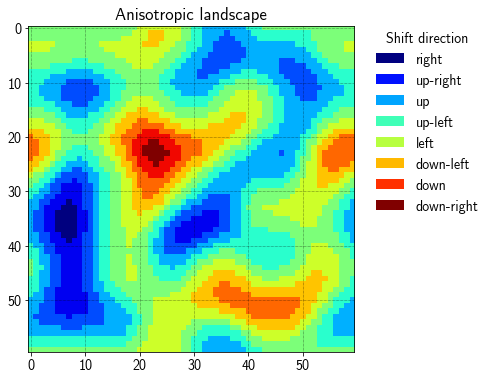

In [102]:
exp.net.plot.landscape()

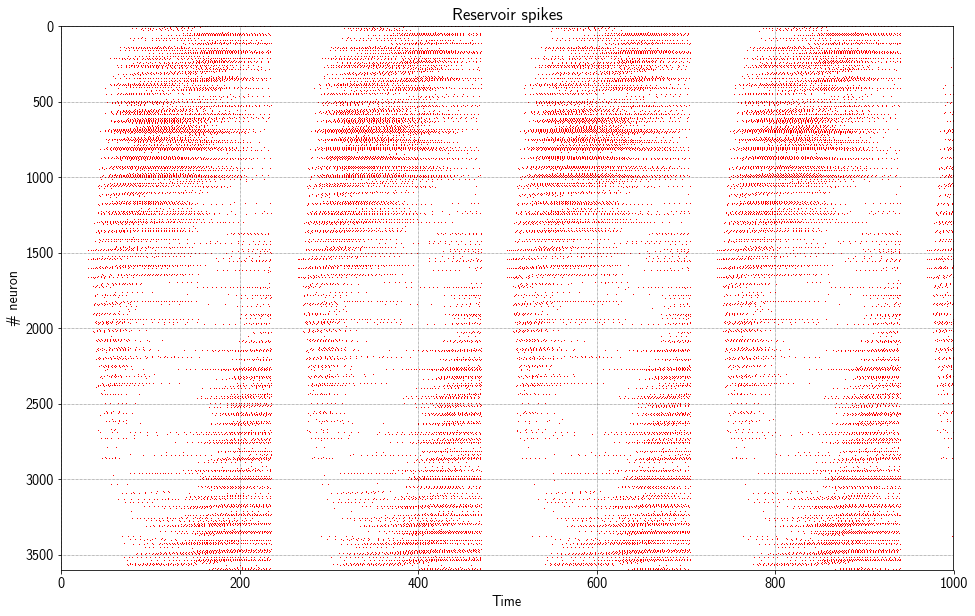

In [6]:
exp.net.plot.reservoirSpikeTrain(fr=0, to=1000)
#exp.net.plot.reservoirSpikeTrain()

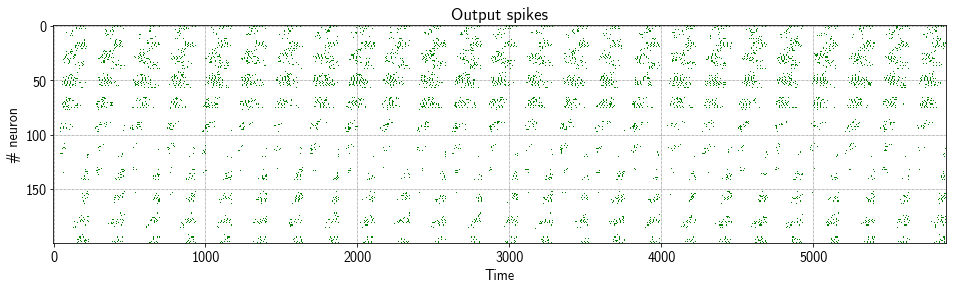

In [7]:
exp.net.plot.outputSpikeTrain()

In [8]:
offset = exp.p.resetOffset + exp.p.inputOffset
data = []
for i in range(exp.p.trials):
    fr, to = (i+1)*offset+i*exp.p.stepsPerTrial, (i+1)*offset+(i+1)*exp.p.stepsPerTrial
    data.append(exp.net.outSpikeTrains[:,fr:to])
    #data.append(exp.net.exSpikeTrains[:,fr:to])
    #data.append(exp.net.outVoltageTrains[:,fr:to])
    #print(exp.net.outSpikeTrains[:,fr:to].shape)
data = np.array(data)

# Store data
import os
dirPath = os.getcwd()
np.save(dirPath+'/data-out_2020-03-31_13-15.npy', data)
#np.save(dirPath+'/data-ex_2020-03-31_11-47.npy', data)

data.shape

(25, 200, 200)

(0, 700)

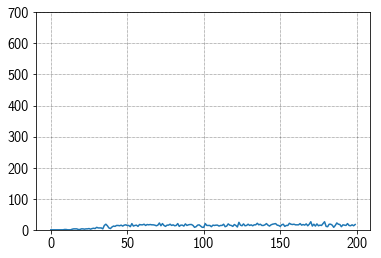

In [9]:
diff01 = np.abs(data[0] - data[2])
p = plt.plot(np.sum(diff01, axis=0))
plt.ylim(0,700)

#plt.figure(figsize=(16, 16))
#p = plt.imshow(diff01)

In [10]:
binSize = 20
bins = np.array([np.mean(data[:, :, i:i+binSize], axis=2) for i in range(0,data.shape[2],binSize)])
bins.shape  # time, trials, neurons

(10, 25, 200)

In [11]:
difs = []
for i in range(1,16):
    dif = np.abs(bins[:,i,:] - bins[:,i+1,:])
    difs.append(dif)
difs = np.array(difs)
    
dif_mean = np.sum(difs, axis=(0,2))/3600
dif_sd = np.std(difs, axis=(0,2))

#p = plt.errorbar(dif_mean, yerr=dif_sd)

In [12]:
data = data[:,:,:-400]
data.shape

(25, 200, 0)

In [13]:
tt = np.vstack([ np.mean(data[:24,:,i+j:i+(j+1)+binSize], axis=2) for j in range(step)])
tt.shape
#np.swapaxes(tt, 0, 1).shape

NameError: name 'step' is not defined

In [ ]:
np.repeat(target[0:2], 24).shape

In [ ]:
e1 = np.sum((np.abs(yes1 - tgtSin))/tgtSin)
print(e1)

e2 = np.sum((np.abs(yes2 - tgtLin))/tgtLin)
print(e2)

e3 = np.sum((np.abs(yes3 - tgtExp))/tgtExp)
print(e3)

e4 = np.sum((np.abs(yes4 - tgtCon))/tgtCon)
print(e4)

In [ ]:
binSize = 10

dtrans = []
for i in range(data.shape[0]):
    dataBinned = np.array([np.mean(data[i, :, j:j+binSize], axis=1) for j in range(0,data[i].shape[1],binSize)])
    (d, evals, evecs) = utils.pca(dataBinned.astype(float), dims_rescaled_data=1)
    dtrans.append(d)

In [ ]:
plt.plot(dtrans[0])
plt.plot(dtrans[1])
plt.plot(dtrans[2])
plt.plot(dtrans[3])
plt.plot(dtrans[4])
plt.plot(dtrans[10])

In [ ]:
#for i in range(data.shape[0]):

for i in range(25):
    plt.plot(dtrans[i])

In [ ]:
#import subprocess
#subprocess.call(shlex.split("jupyter nbconvert notebook.ipynb --to pdf"))